## Sgnal processing Basics

In [1]:
## which python is using
## It should be '/media/hcp4715/study/env_py3/bin/python'
import sys
sys.executable

'/opt/miniconda-latest/envs/neuro/bin/python'

### Dot Product

Dot Product: 529


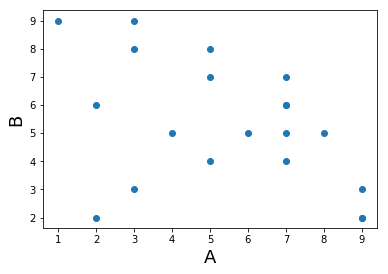

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

a = np.random.randint(1, 10, 20)
b = np.random.randint(1, 10, 20)

plt.scatter(a, b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)

print('Dot Product: %s' %np.dot(a,b))

Waht happens when we make the tow variables more similar?

Dot Product: 462.86541973481394


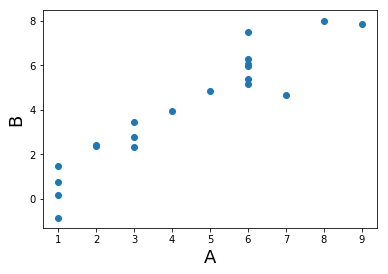

In [3]:
a = np.random.randint(1, 10, 20)
b = a + np.random.randn(20)

plt.scatter(a, b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)

print('Dot Product: %s' %np.dot(a,b))

### Convolution

Convolution in the time domain is an extensive of the dot product in which the dot product is computed iteratively over time.

create a series of spikes, then convolve this signal with a boxcar kernel


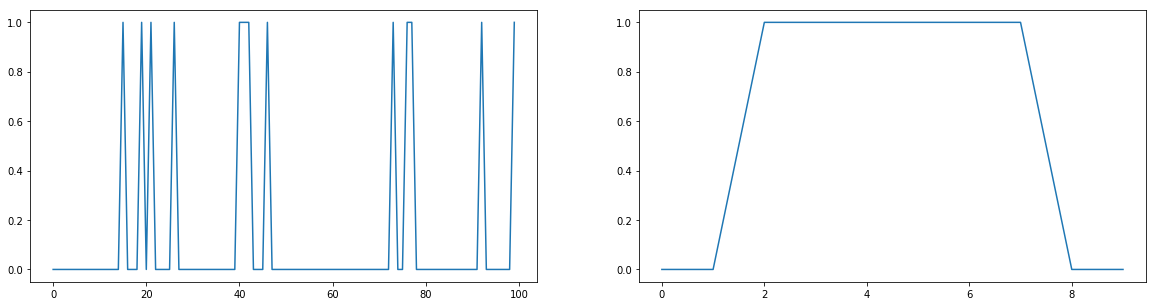

In [4]:
n_samples = 100

signal = np.zeros(n_samples)
signal[np.random.randint(0, n_samples, 15)] = 1

kernel = np.zeros(10)
kernel[2:8] = 1

f, a = plt.subplots(ncols=2, figsize=(20,5))
a[0].plot(signal)
a[1].plot(kernel)

In [5]:
kernel

array([0., 0., 1., 1., 1., 1., 1., 1., 0., 0.])

Notice that the kernel is only 10 sample long and the boxcar width is about 6 seconds (?), while the signal is 100 samples long with 15 single pulse

Let's convolved the signal with the kernel by taking the dot product of the kernel with each point of the signal. This can be illustrated by creating a matrix of the kernel shifted each time point of the signal.

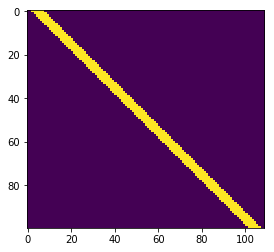

In [6]:
shifted_kernel = np.zeros((n_samples, n_samples+len(kernel)-1))

# shift right by 1 for each iteration
for i in range(n_samples):
    shifted_kernel[i, i:i+len(kernel)] = kernel 
    
plt.imshow(shifted_kernel)

In [7]:
shifted_kernel[99,]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0.])

Now, let's take the dot product of the singal with thie matrix. 
Matrix multiplication consists of taking the dot product of the signal vector with each row of this expanded kernel matrix.

Text(0.5, 0, 'Time')

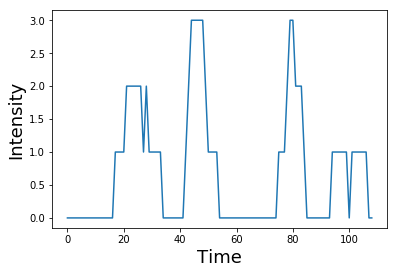

In [8]:
convolved_signal = np.dot(signal, shifted_kernel)

plt.plot(convolved_signal)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

After convolution, each spike has now become the shape of the kernel. 

Also, the shape of the final signal is length of the combined signal and kernel minus one

In [9]:
print("Signal Length: %s" % len(signal))
print("Kernel Length: %s" % len(kernel))
print("Convolved Signal Length: %s" % len(convolved_signal))

Signal Length: 100
Kernel Length: 10
Convolved Signal Length: 109


This process of iteratively taking the dot product of the kernel with each timepoint of the signal and summming all of the values can be performed by using the convolution function from numpy `np.convolve`

Text(0.5, 0, 'Time')

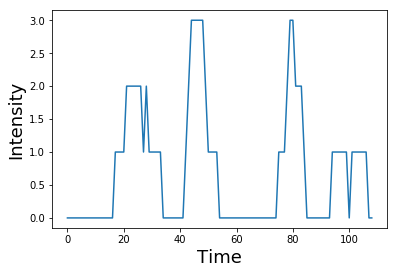

In [10]:
plt.plot(np.convolve(signal, kernel))
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

What happens if the spike have different intensities, reflected by different heights?

Text(0.5, 0, 'Time')

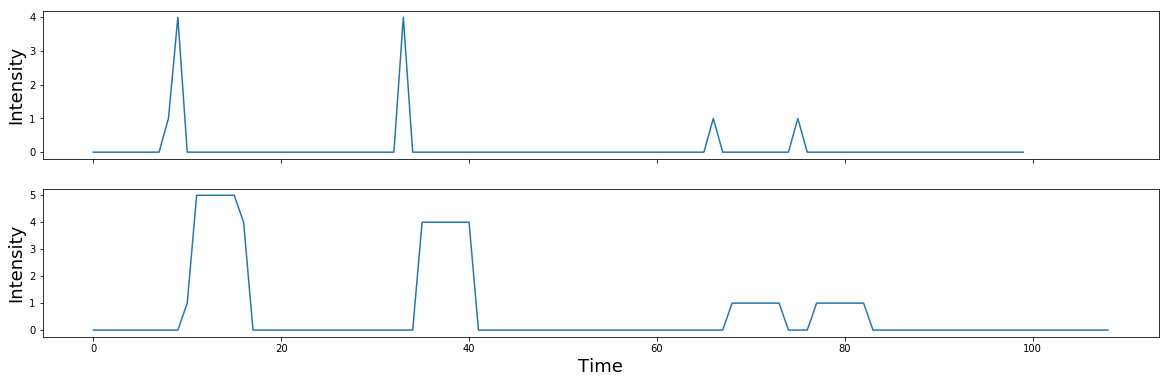

In [11]:
signal = np.zeros(n_samples)
signal[np.random.randint(0, n_samples,5)] = np.random.randint(1, 5, 5)

f,a = plt.subplots(nrows=2,figsize=(20,6), sharex=True)
a[0].plot(signal)
a[0].set_ylabel('Intensity', fontsize=18)
a[1].plot(np.convolve(signal, kernel))
a[1].set_ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

## Now let's switch out the boxcar kernel for something with a more interesting shape, hemodynamic response function.

/media/hcp4715/study/env_py3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


Text(0.5, 0, 'Time')

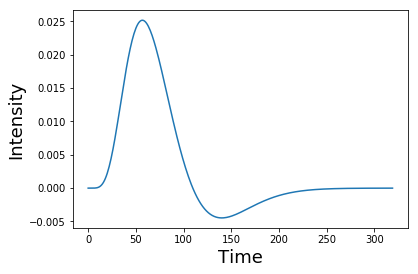

In [12]:
from nltools.external import glover_hrf

tr = 2
hrf = glover_hrf(tr, oversampling=20)
plt.plot(hrf)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

For this example, we oversampled the function to make it more smooth. 

In practice we will want to make sure that the kernel is the correct shape given our sampling resolution

Text(0.5, 0, 'Time')

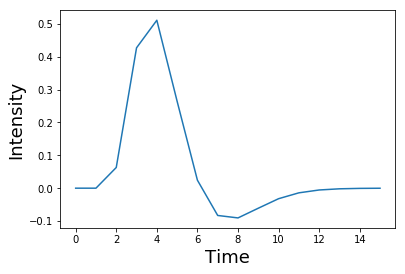

In [13]:
hrf = glover_hrf(tr, oversampling=1)
plt.plot(hrf)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

Now, let's try convovling our event pulse with this HRF kernel

Text(0.5, 0, 'Time')

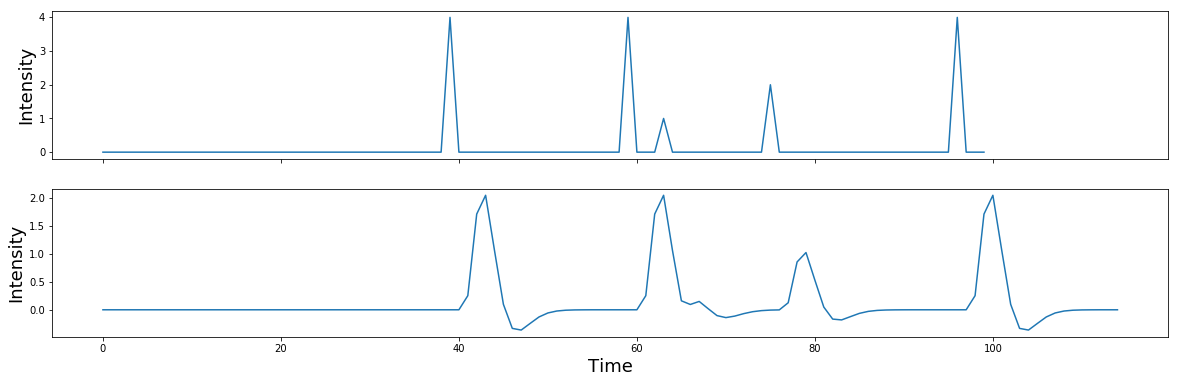

In [14]:
signal = np.zeros(n_samples)
signal[np.random.randint(0,n_samples,5)] = np.random.randint(1,5,5)

f, a = plt.subplots(nrows=2, figsize=(20,6), sharex=True)
a[0].plot(signal)
a[1].plot(np.convolve(signal, hrf))
a[0].set_ylabel('Intensity', fontsize=18)
a[1].set_ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

## Oscillations

Oscillations can be described mathematically as:

$A\sin(2\pi ft + \theta)$

where $f$ is the freuqency or the speed of the oscillation described in the number of cycles per second -$Hz$. Amplitude $A$ refers to the height of the waves, which is half the distance of the peak to the trough. 
Finally, $theta$ describes the phase angle offset, which is radians.

Here we plot a simple sine wave. Try playing with the different parameters (i.e., amplitude, frequency, & theta) to gain an intuition of how they each impact the shape of the wave.

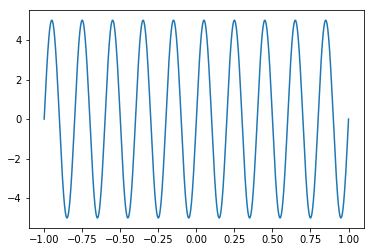

In [15]:
from numpy import sin, pi, arange

sampling_freq = 1000
time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq)
amplitude = 5
freq = 5
theta = 0

simulation = amplitude*sin(2*pi*freq*time + theta)
plt.plot(time, simulation)

next we will generate a simulation combining multiple sine waves oscillating at different frequencies

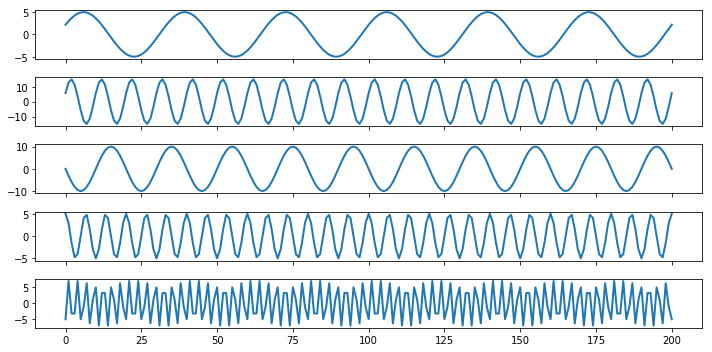

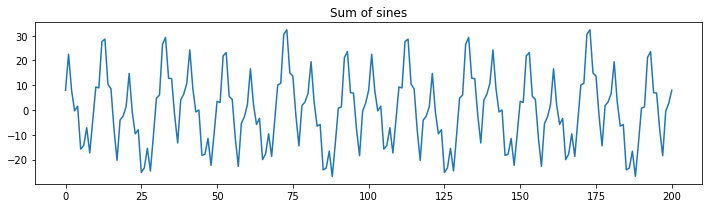

In [72]:
sampling_freq = 100

freq = [3, 10, 5, 15, 35]

amplitude = [5, 15, 10, 5, 7]

phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq)

sine_waves = []

for i, f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
    
sine_waves = np.array(sine_waves)

f, a = plt.subplots(nrows=5, ncols=1, figsize=(10, 5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.plot(np.sum(sine_waves, axis=0))
plt.title("Sum of sines")
plt.tight_layout()

What is the effect of changing the sampling frequency on our ability to measure these oscillations? Try dropping it to be very low (e.g., < 70 $Hz$.)

Notice that signals will alias when the sampling frequency is below the Nyquist frequency of a signal. To observe the oscillation, we need to be sampling at least two times the speed of the oscillation. This will result in a jagged view of the data, but we can still accurately observe the frequency. Higher sampling rates allow us to better observe the underlying singals.

Before moving forward, be sure of rerun the code after increasing the sampling frequency above 70hz

We can add a little bit of gaussian (white) noise on top of this signal to make it even more realistic. Try varying the amount of noise by adjusting the scaling on the noise.

Text(0.5, 0, 'Time')

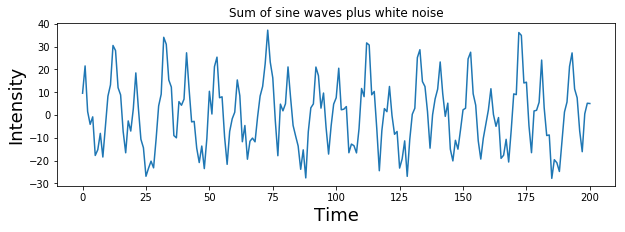

In [73]:
noise = 3 * np.random.randn(sine_waves.shape[1])
signal = np.sum(sine_waves, axis=0) + noise

plt.figure(figsize=(10, 3))
plt.plot(signal)
plt.title("Sum of sine waves plus white noise")
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

## Frequency Domain

how can we identify if there are any frequencies oscillating at a consistent frequency in our signal using the fourier transform. The Fourier transform is essentially convolving different frequencies of sine wave with our data.

One important assumption is that the fourier transformations assume that your signals are stantionary, which means that the generative processes giving rise to the oscillations do not vary over time. In practice, this assumption is rarely true. Often it can be useful to use other techniques such as wavelets to look at time X frequences representations. 

### Discrete time fourier transform

we will gain an intuition about how the fourier transform works by building our own discrete time fourier transform.

The discrete Fourier transform of variable $x$ at frequency $f$ is

$X_f = \sum\limits_{k=0}^{n-1}x_k e^{-i2\pi f(k-1)n^{-1}}$ where $n$ refers to the number of data points in vector $x$, and the capital letter $X_f$ is the fourier conefficient of time series variable $x$ at frequncey $f$

Essentially, we create a bank of sine waves at different frequencies that are linearly spaced. We will compute n-1 sine waves as the zero frequency component will be the mean offset over the entire signal and will simply be zero in our example.

Notice that we are computing complex sine waves using the `np.exp` function instead of the `np.sin` function. `1j` is how we can specify a complex number in python. We can extract the real component using `np.real` or the imaginary using `np.imag`. 

Now lets' create a bank of n-1 linearly spaced complex sine waves.


In [18]:
import numpy as np
from numpy import exp

time = np.arange(0, len(signal), 1)/len(signal)

sine_waves = []
for i in range(len(signal)):
    sine_waves.append(exp(-1j*2*pi*i*time))
    
sine_waves = np.array(sine_waves)

Let's look at the first 5 waves to see their frequencies. 
Remember the first basis functions is zero frequncy component and reflects the mean offsets over the entire signal.

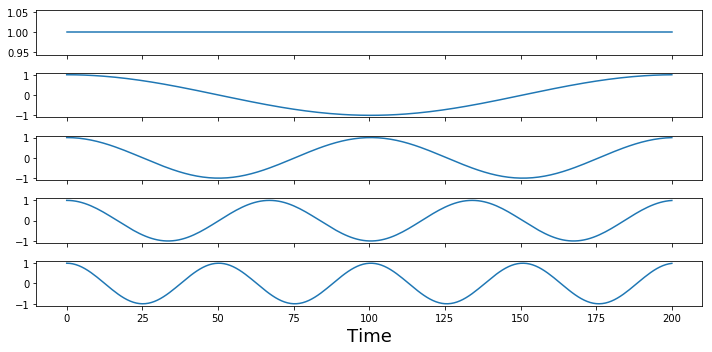

In [19]:
f, a = plt.subplots(nrows=5, figsize=(10,5), sharex=True)
for i in range(0,5):
    a[i].plot(sine_waves[i,:])
plt.xlabel('Time', fontsize=18)
plt.tight_layout()

We can visualize all of the sine waves simultaneously using a heatmap representation. Each row is a different sine wave, and columns reflect time. The intensity of the value is like if the sine wave was coming towards and away rather than up and down. Notice how it looks like that the second half of the sine wave appear to be a mirror image of the first half. this is because the first half contain the positive frequencies, while the second half contains the negative frequencies. Negative frequencies capture sine waves that travel in reverse order around the complex plane compared to the travel forward. This becomes more relevant with the hilbert transform, but for the purpose of this tutorail, we will be ignoring the negative frequencies.

Text(0.5, 0, 'time')

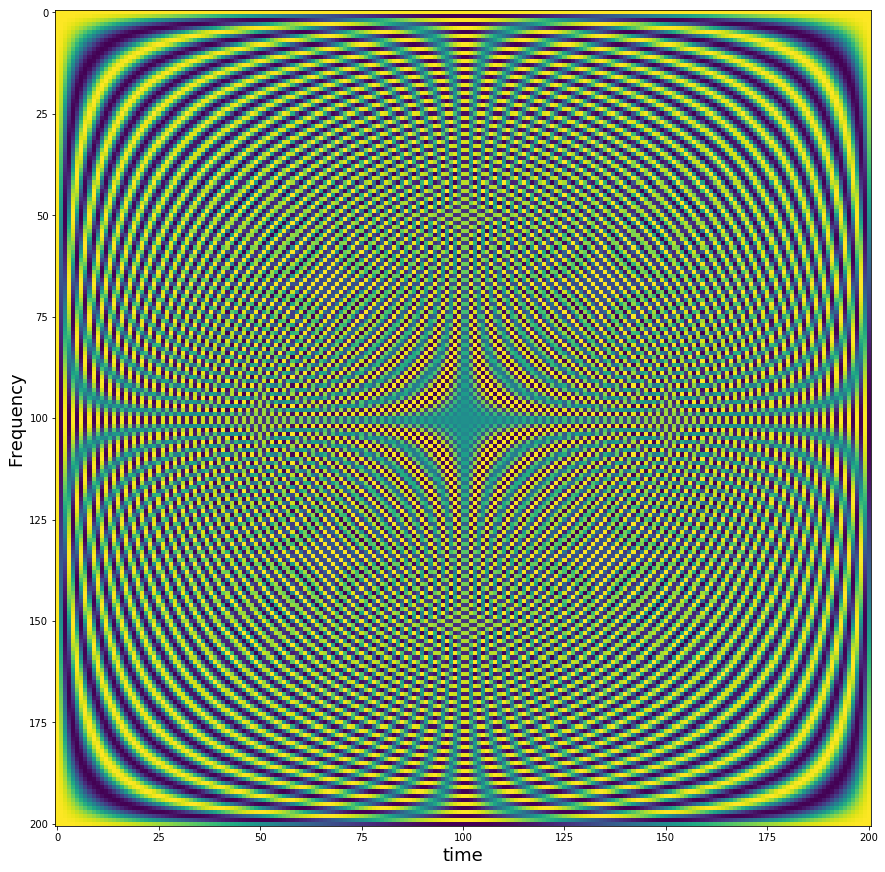

In [20]:
plt.figure(figsize=(15,15))
plt.imshow(np.real(sine_waves))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('time', fontsize=18)

Text(0.5, 0, 'time')

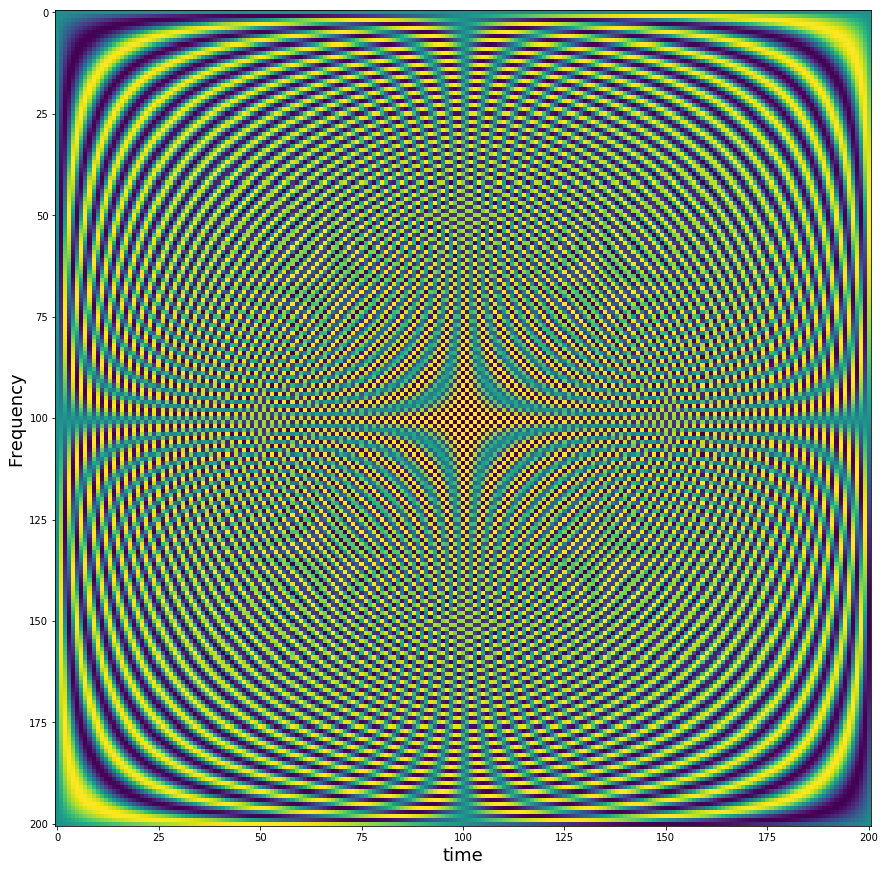

In [21]:
plt.figure(figsize=(15,15))
plt.imshow(np.imag(sine_waves))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('time', fontsize=18)

    Let's take the dot product of each of the sine wave basis set with our signal

In [22]:
fourier = np.dot(signal, sine_waves)

Now we get the fourier transform. 
the fourier transform provides a 3-D representation of data including frequency, power, and phase. 

Here the x axis simply reflects the index of the frequency. The actual frequency is N/2+1 as we are only able to estimate frequencies that are halft the sampling frequences, this is called Nyquist freuqcy.

Text(0, 0.5, 'Amplitude')

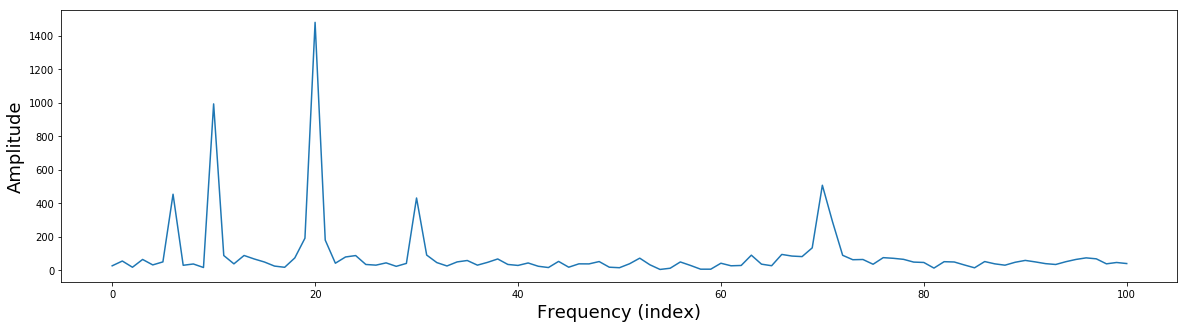

In [23]:
plt.figure(figsize=(20,5))
plt.plot(np.abs(fourier[0:int(np.ceil(len(fourier)/2))]))
plt.xlabel('Frequency (index)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

Notice that there are 5 different frequencies that have varying amplitude. 

Let's zoom in a bit more to see this more clearly and also add the correct frequency labels in *Hz*.

Text(0, 0.5, 'Amplitude')

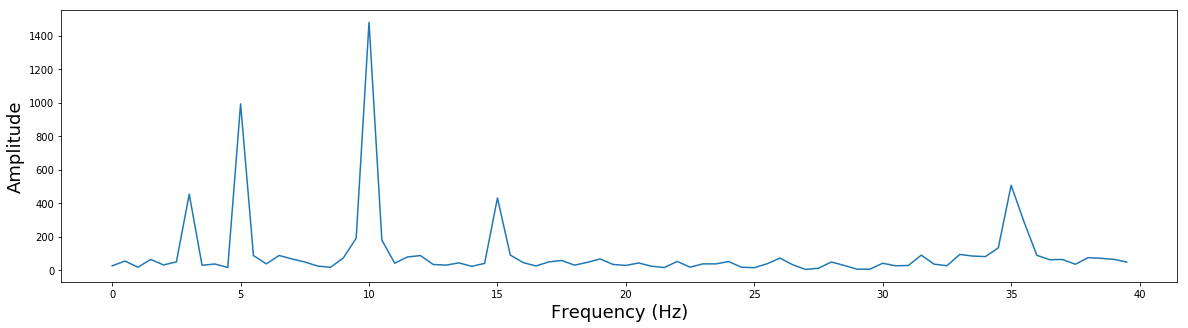

In [24]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0, 80)/2, np.abs(fourier)[0:80])
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

### Inverse Fourier Transform

The fourier transform allows you to represent a time series in the frequency domain. We can also invert this transformation and create a time series ony the frequency domain information using the inverse *fourier transofrm*.

$x_k = \sum\limits_{k=0}^{n-1}X_k e^{i2\pi f(k-1)n^{-1}}$ 

Notice that we are computing the dot probduct between the complex sine wave and the fourier coefficient X instead of the time series data $x$.

Text(0.5, 0, 'Time')

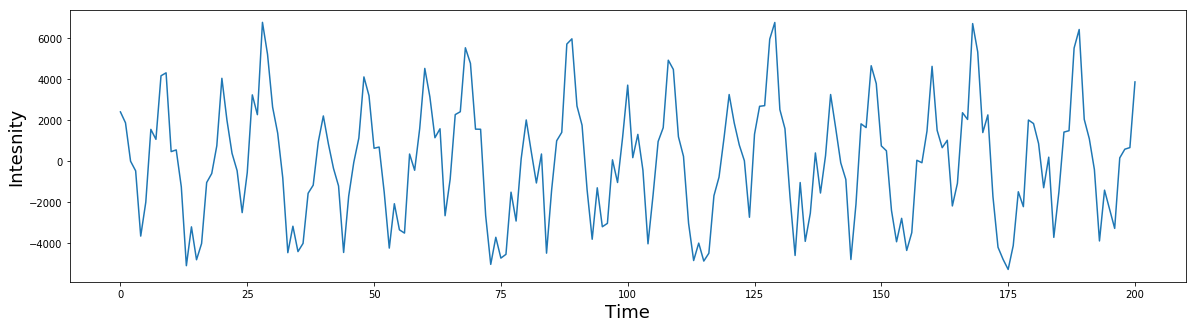

In [25]:
plt.figure(figsize=(20,5))
plt.plot(np.dot(fourier, sine_waves))
plt.ylabel('Intesnity', fontsize=18)
plt.xlabel('Time', fontsize=18)

## Fast Fourier Transform
The discrete time fourier transform is useful to understand the relationship between the time and frequency domains. however, in practice, faster and more efficient methods are used. One popular algorithm is called fast fourier transform (FFT).

Text(0, 0.5, 'Frequency (Hz)')

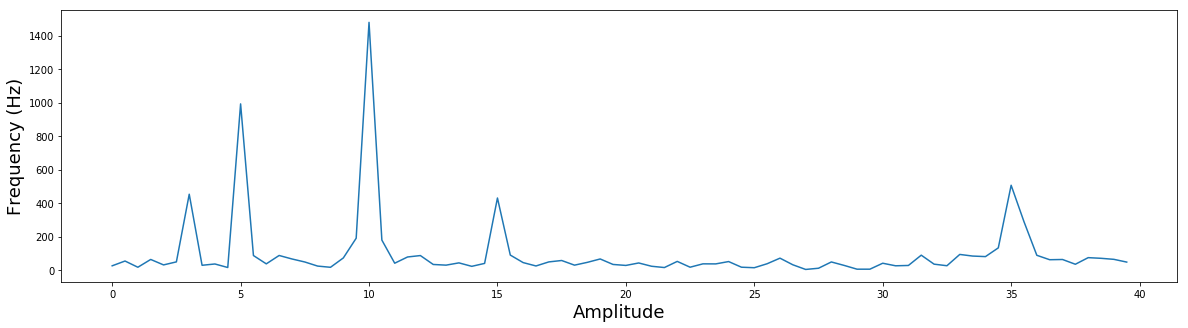

In [26]:
from numpy.fft import fft, ifft

fourier_fft = fft(signal)

plt.figure(figsize=(20,5))
plt.plot((np.arange(0,80)/2), np.abs(fourier_fft[0:80]))
plt.xlabel('Amplitude', fontsize=18)
plt.ylabel('Frequency (Hz)', fontsize=18)

We can also use ifft to perform a inverse fourier transform

Text(0, 0.5, 'time')

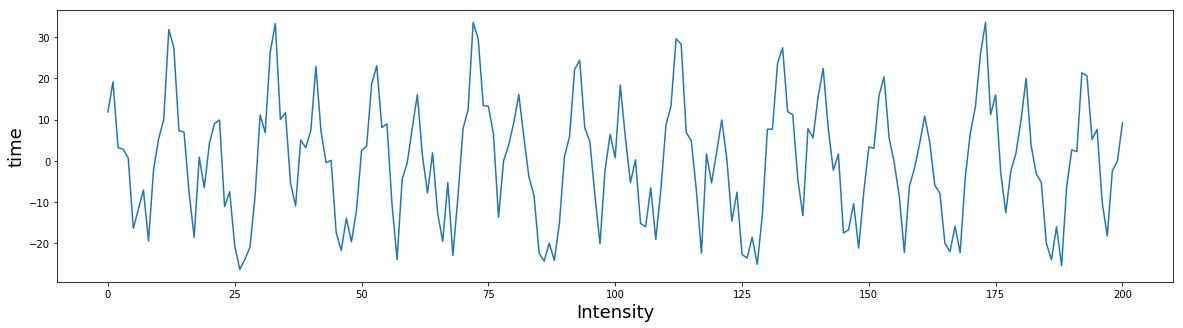

In [28]:
plt.figure(figsize=(20,5))
plt.plot(ifft(fourier))
plt.xlabel('Intensity', fontsize=18)
plt.ylabel('time', fontsize=18)

## Convolution Theorem

Convolution in the time domain is the same mutiplication in the frequncy domain (?)

This means that time domain convolution computation can be performed much more efficiently in the frequency domain via simple multiplication. (the opposite is also true that multiplication in the time domain is the same as convoluation in the frequency domain. 


## Filters

Filters can be classified as finite impulse response (FIR) or infinite impulse response (IIR). These terms describe how a filter responds to a single impulse. FIR filters have a response that ends at a discrete point in time, while IIR filters have a response that continues indefinitely.

Filters are constructed in frequency domain and several properties that need to be considered.

* ripple in the pass-band
* attenuation in the stop-band
* steepness of roll-off
* filter order (i.e., length for FIR filters)
* time-domain ringing

In general, there is a frequency by time tradeoff. The sharper something is in frequency, the broader it is in time, and vice versa.

Here we will use IIR butterworth filters as an example.

### High Pass
High pass filters only allow high frequency signals to remain, effectively *removing* any low frequency information.

Here we will construct a high pass butterworth filter and plot it in frequency space.

Note: this example requires scipy 1.2.1+.

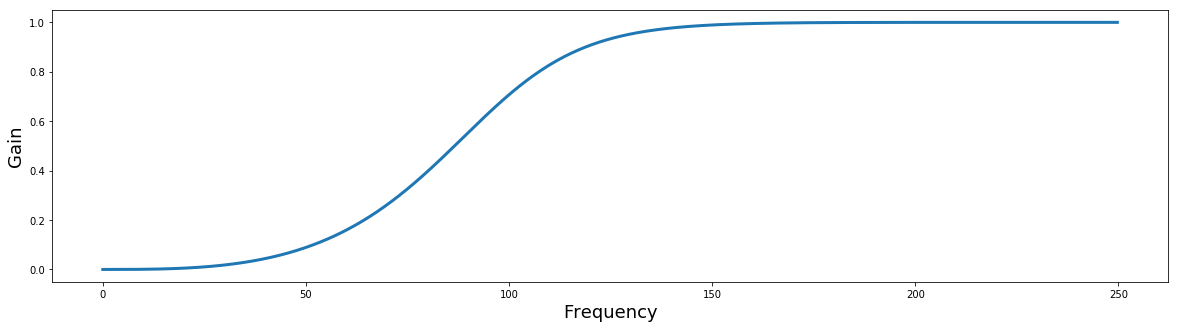

In [54]:
from scipy.signal import butter, filtfilt, freqz

filter_order = 3
frequency_cutoff = 25
sampling_frequency = 500

# create the filter
b, a = butter(filter_order, frequency_cutoff, btype='high', output='ba', fs=sampling_frequency)

def rad_sample_to_hz(x, fs):
    return (x*fs)/(2*np.pi)

def plot_filter(b, a, fs):
    plt.figure(figsize=(20,5))
    w, h = freqz(b, a, worN=512*2, whole=False)
    plt.plot(rad_sample_to_hz(w, fs), abs(h), linewidth=3)
    plt.ylabel('Gain', fontsize=18)
    plt.xlabel('Frequency', fontsize=18)
    
plot_filter(b, a, sampling_frequency)

notice how the gain scales from [0, 1]? filters can be multiplied by the FFT of a signal to apply the filter in the frequency domain. when the resulting signal is translformed back in the time domain using the inverse FFT, the new signal will be filtered. This can be much faster than applying filters in the time domain.

The filter_order parameter adjusts the sharpness of the cutoff in the frequncy domain. Try playing with different values to see how it changes the filter plot.


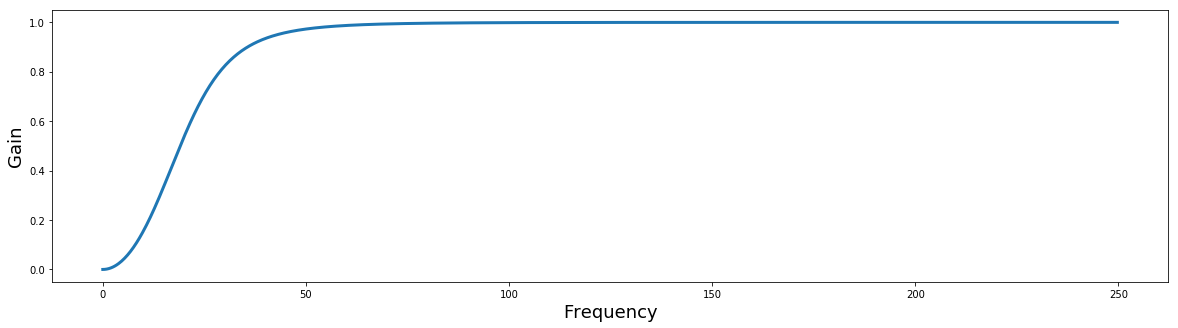

In [47]:
filter_order = 2
frequency_cutoff = 25
sampling_frequency = 500

# create the filter
b, a = butter(filter_order, frequency_cutoff, btype='high', output='ba', fs=sampling_frequency)

plot_filter(b, a, sampling_frequency)

What does the filter looks like in the time domain?

Text(0.5, 0, 'Time')

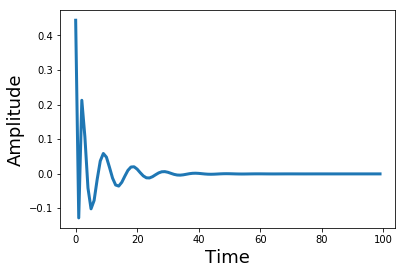

In [43]:
from scipy.signal import sosfreqz

filter_order=8
sos = butter(filter_order, frequency_cutoff, btype='high', output='sos', fs=sampling_frequency)
w_sos, h_sos = sosfreqz(sos)

plt.plot(ifft(h_sos)[0:100], linewidth=3)
plt.ylabel('Amplitude', fontsize=18)
plt.xlabel('Time', fontsize=18)

Now, let's apply the filter to our data. We will be applying the filter to the signal in the time domain using the `filtfilt` function. Tshi is a good default option, even though there are several other functions to apply the filter. `filtfilt` applies the filter forward and then in reverse ensuring that there is zero-phase distortion.

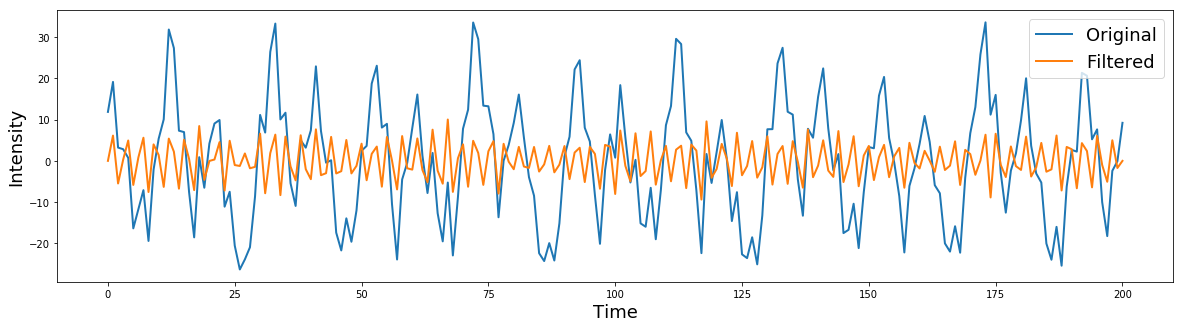

In [56]:
filter_order = 2
frequency_cutoff = 125
sampling_frequency = 500

# create the filter

b, a = butter(filter_order, frequency_cutoff, btype='high', output='ba', fs=sampling_frequency)

filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20, 5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original', 'Filtered'], fontsize=18)

### Low Pass

Low pass filters only retain low frequency signals, which *removes* any high frequency informations.

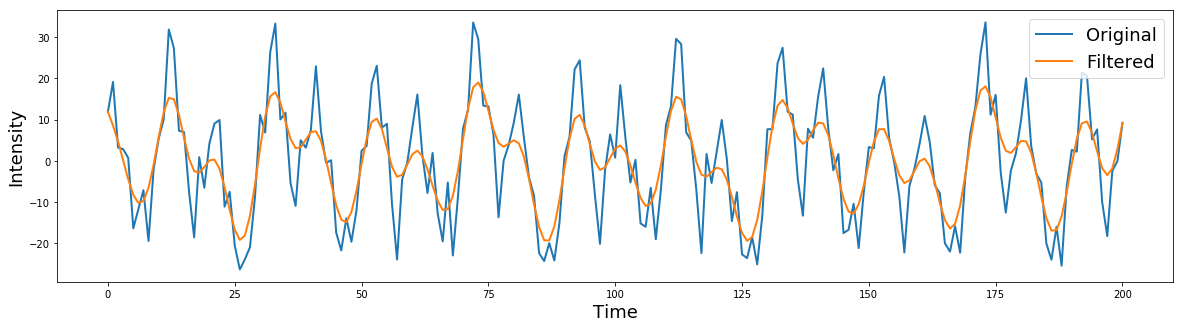

In [59]:
from scipy.signal import butter, filtfilt

filter_order = 2
frequency_cutoff = 50

sampling_frequences = 500

# creat the fitler
b, a = butter(filter_order, frequency_cutoff, btype='low', output='ba', fs=sampling_frequency)

# Apply the filter
filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original', 'Filtered'], fontsize=18)

What does the filter look like?

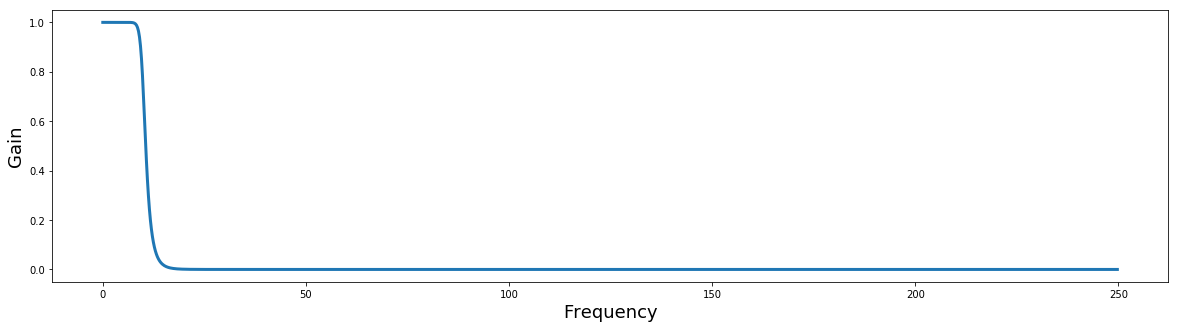

In [61]:
filter_order = 10
frequency_cutoff = 10
sampling_frequency = 500

# Create the filter
b, a = butter(filter_order, frequency_cutoff, btype='low', output='ba', fs=sampling_frequency)

plot_filter(b, a, sampling_frequency)

### Bandpass

Bandpass filters permit retaining only a specific frequency. Morlet wavelets are an exampleof a bandpass filter. 

Let's try selecting removing specific frequencies

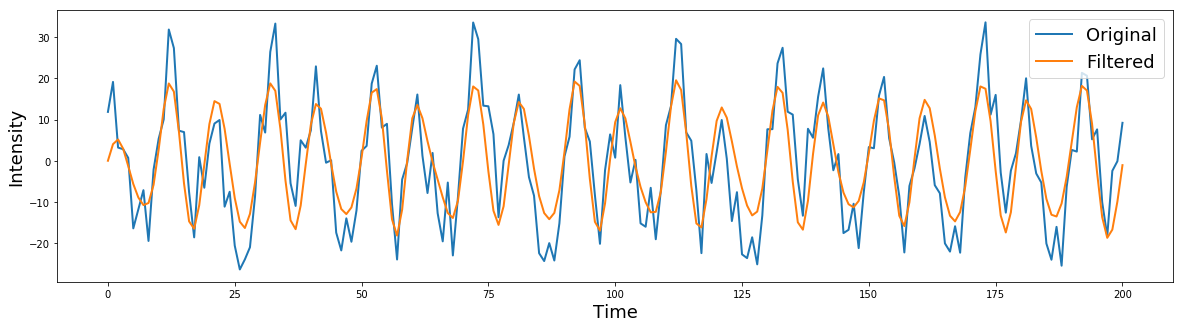

In [64]:
filter_order = 2
low_cut = 30
high_cut = 90

# creat the fitler
b, a = butter(filter_order, [low_cut, high_cut], btype='bandpass', output='ba', fs=sampling_frequency)

# Apply the filter
filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original', 'Filtered'], fontsize=18)

### Band-stop
Bandstop filters removes a specific frequency from the signal

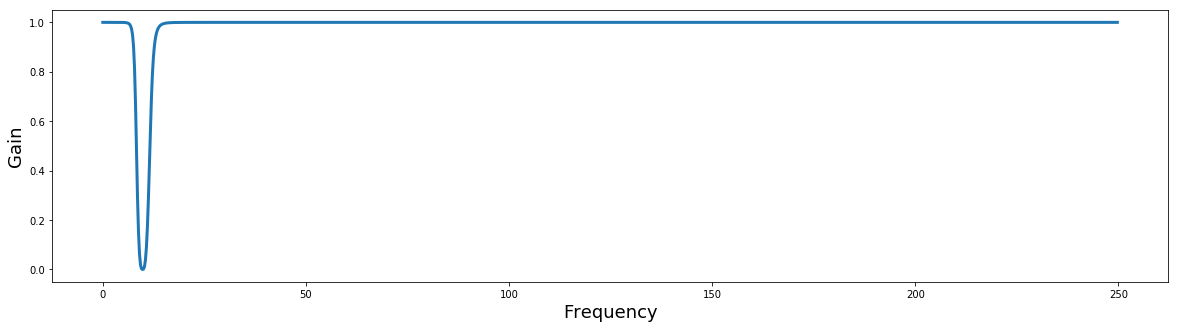

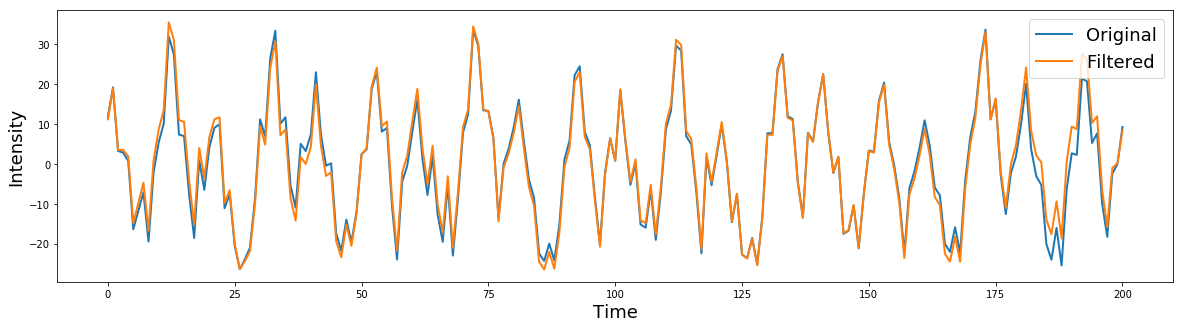

In [68]:
filter_order = 3
low_cut = 8
high_cut = 12

# creat the fitler
b, a = butter(filter_order, [low_cut, high_cut], btype='bandstop', output='ba', fs=sampling_frequency)

# plot the filter
plot_filter(b, a, sampling_frequency)

# Apply the filter
filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original', 'Filtered'], fontsize=18)

## Exercise

1) Create a simulated time series with 7 different frequencies with noise

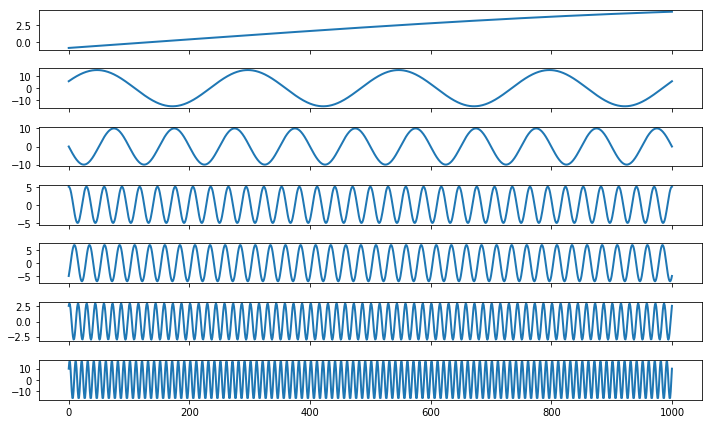

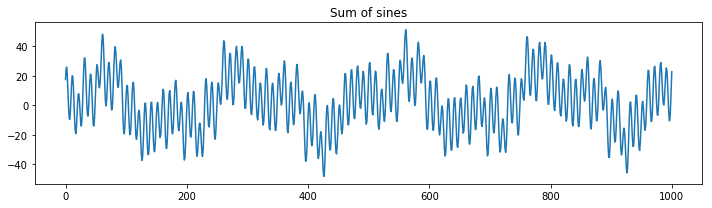

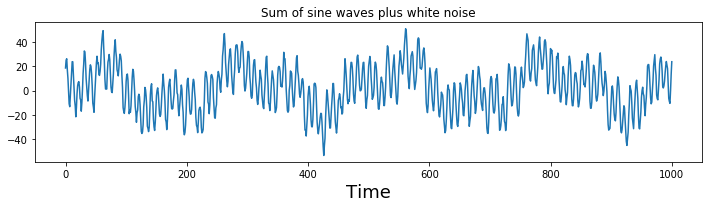

In [79]:
sampling_freq = 500

freq = [0.1, 2, 5, 17, 20, 35, 50]

amplitude = [5, 15, 10, 5, 7, 3, 17]

phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4, 1/3, 1/5])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq)

sine_waves = []

for i, f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
    
sine_waves = np.array(sine_waves)

f, a = plt.subplots(nrows=7, ncols=1, figsize=(10, 6), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.plot(np.sum(sine_waves, axis=0))
plt.title("Sum of sines")
plt.tight_layout()

noise = 2 * np.random.randn(sine_waves.shape[1])
signal = np.sum(sine_waves, axis=0) + noise

plt.figure(figsize=(10, 3))
plt.plot(signal)
plt.title("Sum of sine waves plus white noise")
#plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.tight_layout()


2) Show that you can identity each signal using a FFT

Text(0, 0.5, 'Frequency (Hz)')

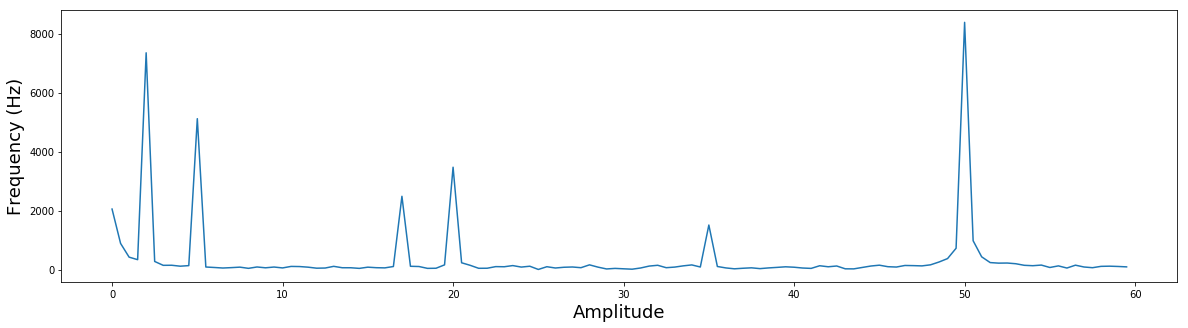

In [81]:
from numpy.fft import fft, ifft

fourier_fft = fft(signal)

plt.figure(figsize=(20,5))
plt.plot((np.arange(0,120)/2), np.abs(fourier_fft[0:120]))
plt.xlabel('Amplitude', fontsize=18)
plt.ylabel('Frequency (Hz)', fontsize=18)

3) Remove one frequency with a band stop filter
4) Reconstruct the signal with the frequency removed and compare it to the original

Text(0, 0.5, 'Frequency (Hz)')

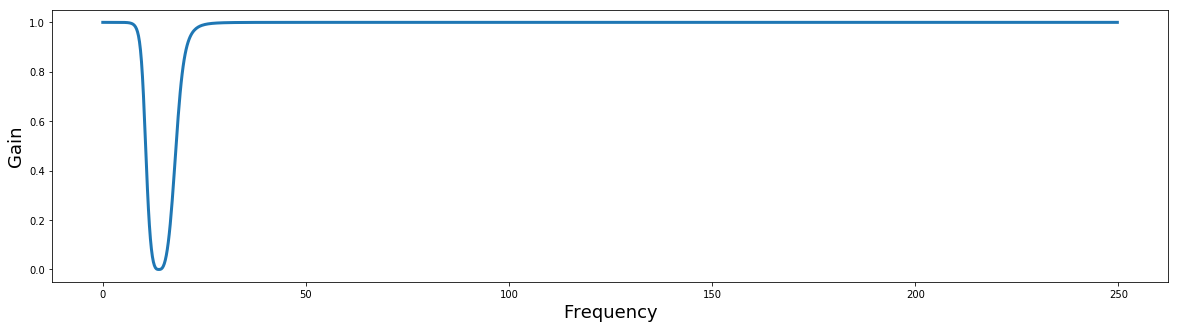

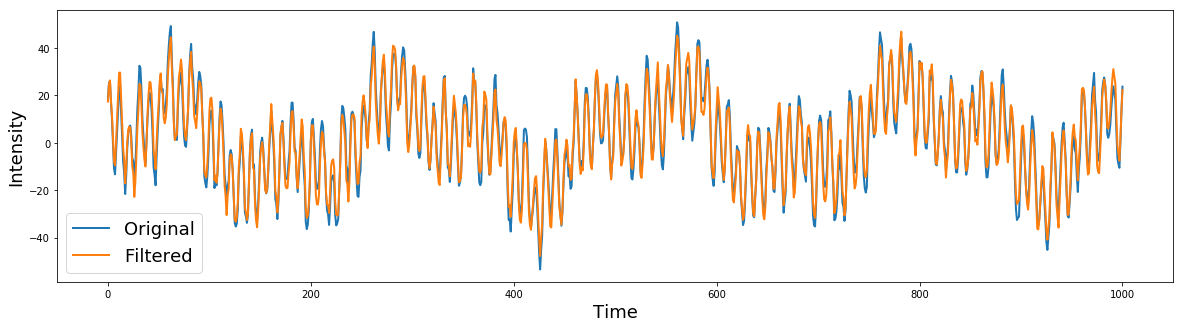

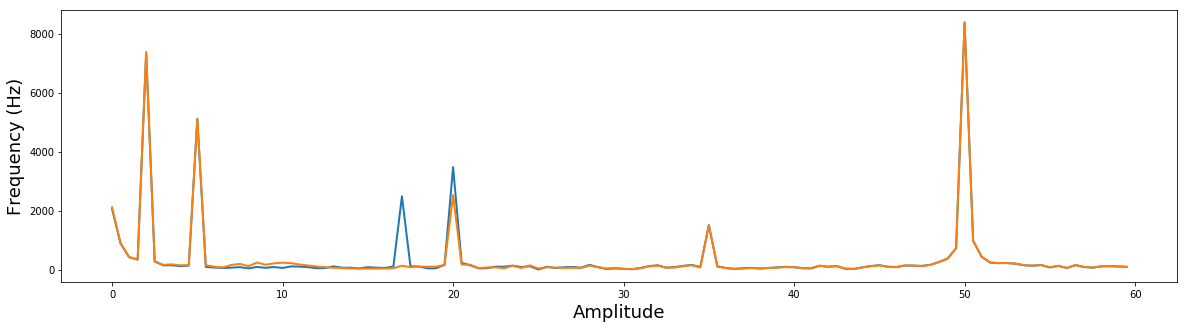

In [87]:
filter_order = 3
low_cut = 10
high_cut = 19

# creat the fitler
b, a = butter(filter_order, [low_cut, high_cut], btype='bandstop', output='ba', fs=sampling_frequency)

# plot the filter
plot_filter(b, a, sampling_frequency)

# Apply the filter
filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original', 'Filtered'], fontsize=18)

fourier_fft_org = fft(signal)
fourier_fft = fft(filtered)

plt.figure(figsize=(20,5))
plt.plot((np.arange(0,120)/2), np.abs(fourier_fft_org[0:120]), linewidth=2)
plt.plot(np.arange(0,120)/2, np.abs(fourier_fft[0:120]), linewidth=2)
plt.xlabel('Amplitude', fontsize=18)
plt.ylabel('Frequency (Hz)', fontsize=18)